### Problem Statement :- Predicts the selling price of second-hand cars Using LinearRegression Machine learning algorithm. 

### 1) Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2) Load Dataset

In [2]:
data = pd.read_csv("car data.csv")

### About Dataset

This dataset contains information about used cars.

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset are as follows:

1) name

2) year

3) selling_price

4) km_driven

5) fuel

6) seller_type

7) transmission

8) Owner

In [3]:
data.head() # checking the first five rows from the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape ## printing the no. of columns and rows of the dataframe

(301, 9)

In [5]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum() # finding the count of missing values from different columns

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.describe() # Statistical Information 

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Now the data looks good and there are no missing values. Also, the first cloumn is just Car_Name, so we don' need that column. Let's drop it from data and make it more clean.

In [8]:
data= data.drop(columns = ['Car_Name'])
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Let's visualize the data and analyze the relationship between independent and dependent variables:

In [9]:
Categorical_features = [col for col in data.columns if data[col].dtype == 'O']
Categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [10]:
numerical_features = [col for col in data.columns if data[col].dtype != 'O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

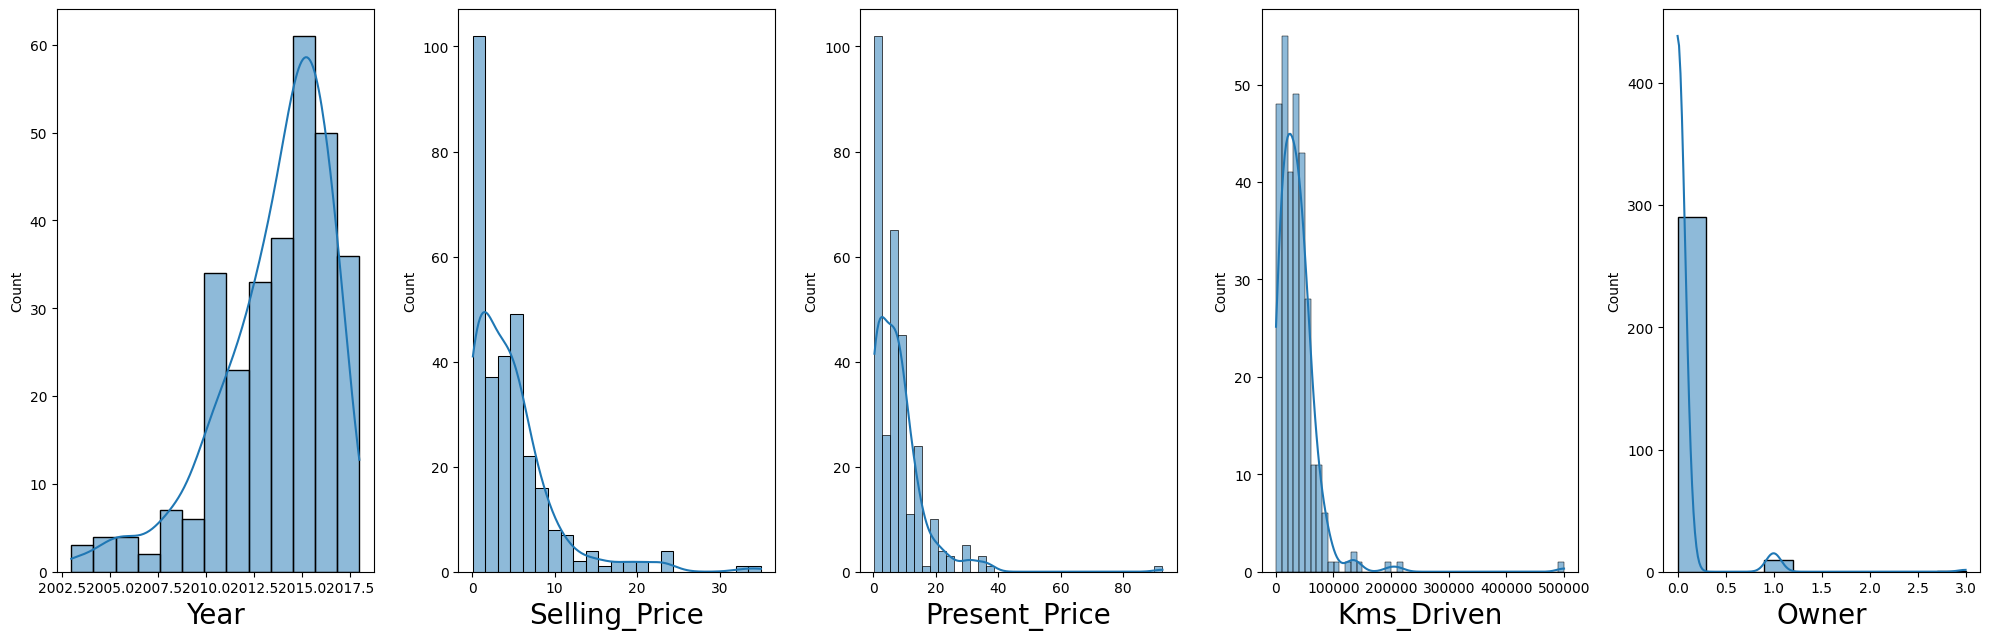

In [11]:
# let's see how numerical_features is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_features:
    if plotnumber<=5 :
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

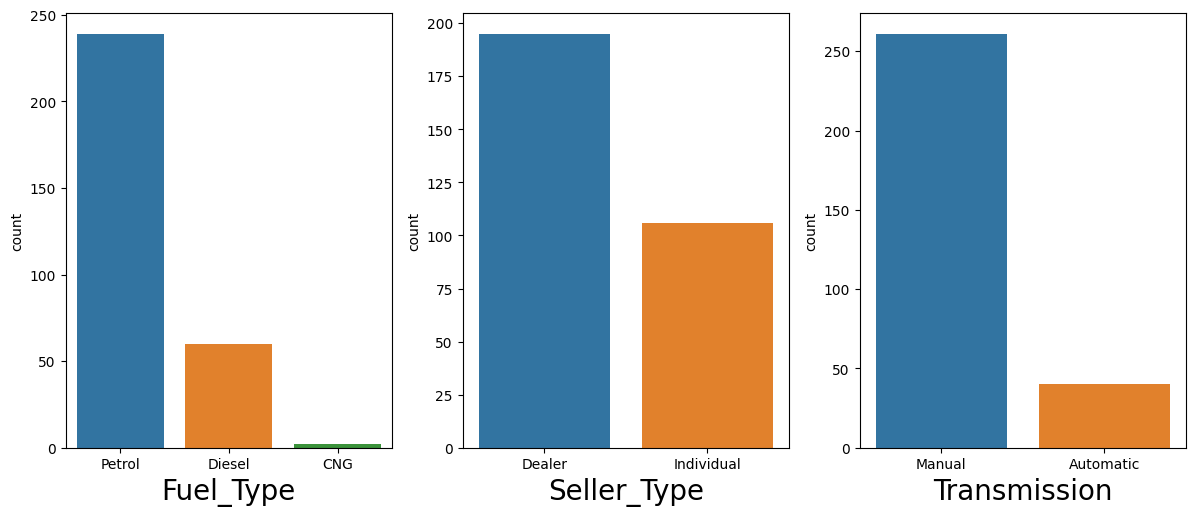

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Categorical_features:
    if plotnumber<=3 :
        ax = plt.subplot(5,5,plotnumber)
        sns.countplot(x = column,data = data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Handling Categorical variables with More than Two Categories

Let's create a new column for Fuel_Type , Seller_Type , Transmission Columns.

We need to represent the 'Fuel_Type' , 'Seller_Type' , 'Transmission' column numerically Hence, for that we’ll create another dummy variable:

In [13]:
data = pd.get_dummies(data)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


What does the encoding say?

1) For "Fuel_Type" Column 

    CNG is encoded as Fuel_Type_CNG = 1 , Fuel_Type_Diesel = 0 & Fuel_Type_Petrol = 0
    
    Diesel is encoded as Fuel_Type_CNG = 0 , Fuel_Type_Diesel = 1 and Fuel_Type_Petrol = 0

    Petrol is encoded as Fuel_Type_CNG = 0 , Fuel_Type_Diesel = 0 and Fuel_Type_Petrol = 1

2) For "Seller" Column

    Dealer is encoded as Seller_Type_Dealer = 1 & Seller_Type_Individual = 0
    
    Individual is encoded as Seller_Type_Dealer = 0 & Seller_Type_Individual = 1

3) For "Transmission" Column

    Automatic is encoded as Transmission_Automatic = 1 & Transmission_Manual = 0
    
    Individual is encoded as Transmission_Automatic = 0 & Transmission_Manual = 1
     

Now the question is: Why have we used two/one dummy columns instead of three/Two?

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Fuel_Type_Diesel as well as Fuel_Type_Petrol is 0, it automatically means that the data belongs to Fuel_Type_CNG.
This is called handling the dummy variable trap. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns. Let's include the two new dummy variables in the model:

In [14]:
# create X(Independent data) and y(dependent data)
feature = ["Year","Present_Price","Kms_Driven","Owner","Fuel_Type_CNG","Fuel_Type_Diesel","Seller_Type_Dealer","Transmission_Automatic"]
X = data[feature]
y = data.Selling_Price

In [15]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,2014,5.59,27000,0,0,0,1,0
1,2013,9.54,43000,0,0,1,1,0
2,2017,9.85,6900,0,0,0,1,0
3,2011,4.15,5200,0,0,0,1,0
4,2014,6.87,42450,0,0,1,1,0


In [16]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Divide The Dataset into train and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=5)

In [19]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((225, 8), (225,), (76, 8), (76,))

### Implementation of LinearRegression Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
prediction = lr.predict(x_test)

In [23]:
lr.score(x_train,y_train) ## training score

0.8799908666232624

In [24]:
lr.score(x_test,y_test) ## test score

0.8608525898496736

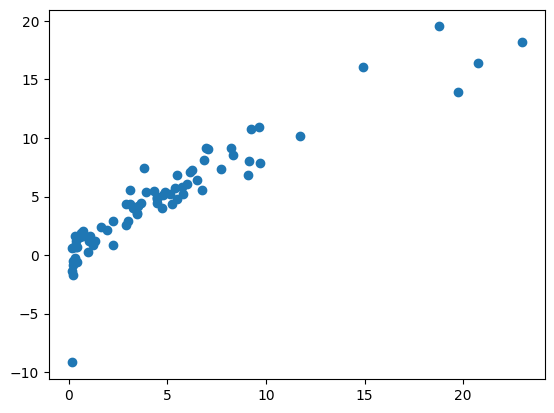

In [25]:
plt.scatter(y_test,prediction) ## plot y_test v/s prediction value of model

### Evolution Metrics of model

In [26]:
from sklearn import metrics

In [27]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.140996108785454
MSE :  3.281596341663886
RMSE :  1.8115176901327479
R squared :  0.8608525898496736


### Implementation of Regularization Model

### 1) LASSO (L1-Norm) 

In [28]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [29]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lassocv = LassoCV(alphas = None,cv =10, max_iter = 100000,normalize = True)
lassocv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [30]:
# best alpha parameter
alpha = lassocv.alpha_
alpha

0.014905096676743066

In [31]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.014905096676743066)

In [32]:
prediction = lasso_reg.predict(x_test)

In [33]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.1318151217096615
MSE :  3.3386758590846632
RMSE :  1.827204383500834
R squared :  0.8584322839391348


### 2) Ridge(L2-Norm)

In [34]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.80829434, 3.19270631, 8.67712036, 1.50797466, 5.05613143,
       2.14065053, 2.50684957, 5.36556922, 6.86256732, 5.21627503,
       5.53858529, 1.31744934, 4.06171711, 7.91892373, 1.27401206,
       9.67145768, 7.44755482, 4.10709335, 9.72760678, 6.34899507,
       5.17865612, 3.08172052, 3.33165181, 0.0256356 , 3.02834027,
       6.56896936, 6.91804663, 4.75168378, 0.41840842, 6.61135918,
       2.94595747, 2.81505245, 6.23873207, 7.05367109, 8.86183837,
       0.29098844, 7.10059827, 6.78598342, 5.46854433, 9.92765389,
       0.19795626, 4.10538433, 1.30114739, 1.11407669, 9.67735916,
       8.29814998, 2.72088786, 0.57966814, 2.5160383 , 1.89507519]),
        cv=10, normalize=True)

In [35]:
ridgecv.alpha_

0.19795625719175258

In [36]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.19795625719175258)

In [37]:
prediction = ridge_model.predict(x_test)

In [38]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.1391472558881635
MSE :  3.2789563269765876
RMSE :  1.8107888686913745
R squared :  0.8609645326873202


### 3) Elastic Net

In [39]:
elasticCV = ElasticNetCV(alphas = None, cv =10, max_iter = 100000,normalize = True)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10, max_iter=100000, normalize=True)

In [40]:
elasticCV.alpha_

0.0014836603477759698

In [41]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal preference to L1 and L2
elasticCV.l1_ratio

0.5

In [42]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0014836603477759698)

In [43]:
prediction = elasticnet_reg.predict(x_test)

In [44]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.13817800437153
MSE :  3.2820060378659783
RMSE :  1.811630767531281
R squared :  0.8608352177662318


### Prediction

In [45]:
Year = int(input("Enter Year of Purchase : "))
Present_Price = int(input("Enter Showroom Price of your car : "))
Kms_Driven = int(input("How many kilometer drive : "))
Owner = int(input("How much owners previously the car had? (0,1 or 2) : "))
Fuel_Type = str(input("What is fuel type? (CNG , DIESEL , PETROL) : "))
Seller_Type = str(input("Are u Dealer or Individual ? : "))
Transmission = str(input("Enter Transmission Type : (Automatic , Manual Car) : "))

Enter Year of Purchase : 2002
Enter Showroom Price of your car : 500000000000
How many kilometer drive : 5
How much owners previously the car had? (0,1 or 2) : 0
What is fuel type? (CNG , DIESEL , PETROL) : CNG
Are u Dealer or Individual ? : Dealer
Enter Transmission Type : (Automatic , Manual Car) : Automatic


In [46]:
if Fuel_Type == "CNG" :
    Fuel_Type_CNG , Fuel_Type_Diesel = 1 , 0
elif Fuel_Type == "DIESEL":
    Fuel_Type_CNG , Fuel_Type_Diesel = 0 , 1
else:
    Fuel_Type_CNG , Fuel_Type_Diesel = 0 , 0

In [47]:
if Seller_Type == "Dealer":
    Seller_Type_Dealer = 1
else:
    Seller_Type_Dealer = 0

In [48]:
if Transmission == "Automatic":
    Transmission_Automatic = 1
else:
    Transmission_Automatic = 0

In [49]:
prediction_value = lr.predict([[Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic]])
print("Predicted value : ",prediction_value[0])    

Predicted value :  220029902516.13324
